In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import imshow,show
from scipy import integrate as int
from gaussxw import gaussxw, gaussxwab
from scipy.special import factorial
import cmath
from scipy.constants import epsilon_0 as e0
from scipy.constants import m_e
from banded import banded

### Exercise 5.21: Electric Field of a Charge Distrinution

a) Two charges of $\pm 1 C$, 10 cm apart.  Calculate the Electric potential on a 1x1m square plane surrounding the charges and passing through them.  Calculate the potential at 1cm spaced points and visualize it with a density plot.  The potential at a distance $r$ from the origin is:
$$\phi = \frac{q}{4\pi\epsilon_0r}$$ 

and the electric field is:

$$E = -\nabla\phi$$

b) Calculate and plot the gradient of the potential to represent the electric field.  Plot this using quiver.

$$E = -\nabla\phi = -\frac{d}{dx}\phi  -\frac{d}{dy}\phi$$

the total $\phi$ is:

$$\phi = \frac{-q}{4\pi\epsilon_0r} + \frac{-q}{4\pi\epsilon_0r}$$

and the partial derivatives are:

$$\frac{df}{dx} = \frac{f(x+h/2,y) - f(x-h/2,y)}{h}$$
$$\frac{df}{dy} = \frac{f(x,y+h/2) - f(x,y-h/2)}{h}$$

Then we have:

$$\frac{d\phi}{dx} = \frac{1}{h}\left[\frac{-q}{4\pi\epsilon_0\sqrt{(x+h/2-x_1)^2+(y - y_1)^2}} + \frac{q}{4\pi\epsilon_0\sqrt{(x+h/2-x_1)^2+(y - y_1)^2}}\right]$$
$$-\frac{1}{h}\left[\frac{-q}{4\pi\epsilon_0\sqrt{(x-h/2-x_1)^2+(y - y_1)^2}} + \frac{q}{4\pi\epsilon_0\sqrt{(x-h/2-x_1)^2+(y - y_1)^2}}\right]$$

and similarly for $\frac{d\phi}{dy}$

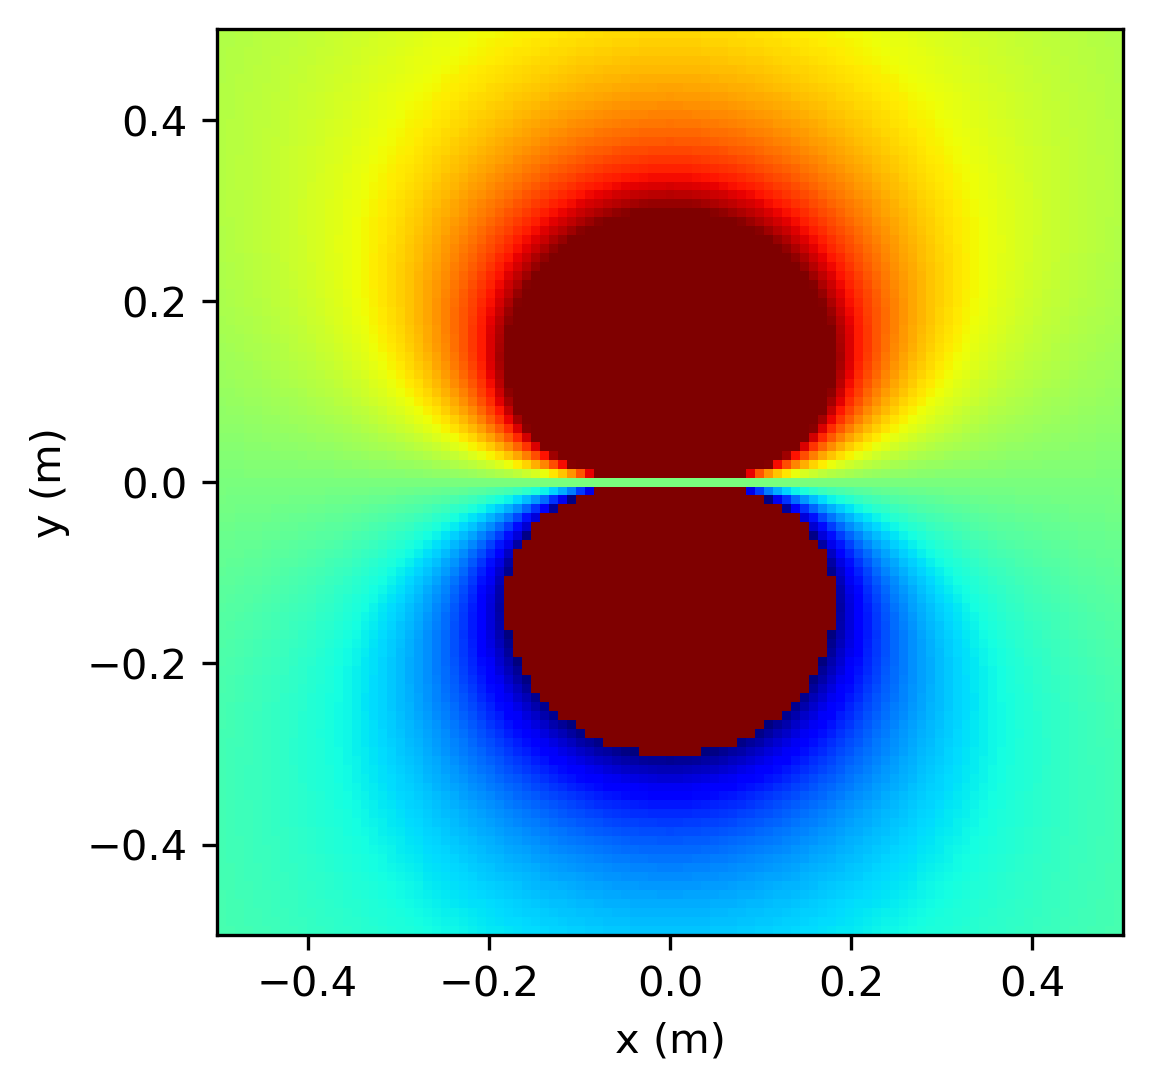

In [2]:
##### PART A

## define phi
def phi1(r):
    return 1/4/np.pi/e0/r
def phi2(r):
    return -1/4/np.pi/e0/r

x = np.arange(-0.5,0.51,0.01)
y = np.arange(-0.5,0.51,0.01)

image = np.zeros([len(x),len(y)])

#Calculate the potential at every point on grid
for i in range(0,len(x)):
    xval = x[i]
    for j in range(0,len(y)):
        yval = y[j]
        
        #make sure the two charges are separated by 1cm
        r1 = np.sqrt((xval-0.05)**2+yval**2)
        r2 = np.sqrt((xval+0.05)**2+yval**2)
        total = phi1(r1)+phi2(r2)
        
        # Create a threshold so the potentials are visible
        if abs(total) > 1e10: 
            image[i, j] = 1e10
        else: 
            image[i, j] = total 
        

#Plot image
plt.figure(1,dpi=300)
plt.imshow(image,cmap="jet",extent=(-0.5,0.5,-0.5,0.5), origin="center")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show()

Text(0.5, 0, 'x')

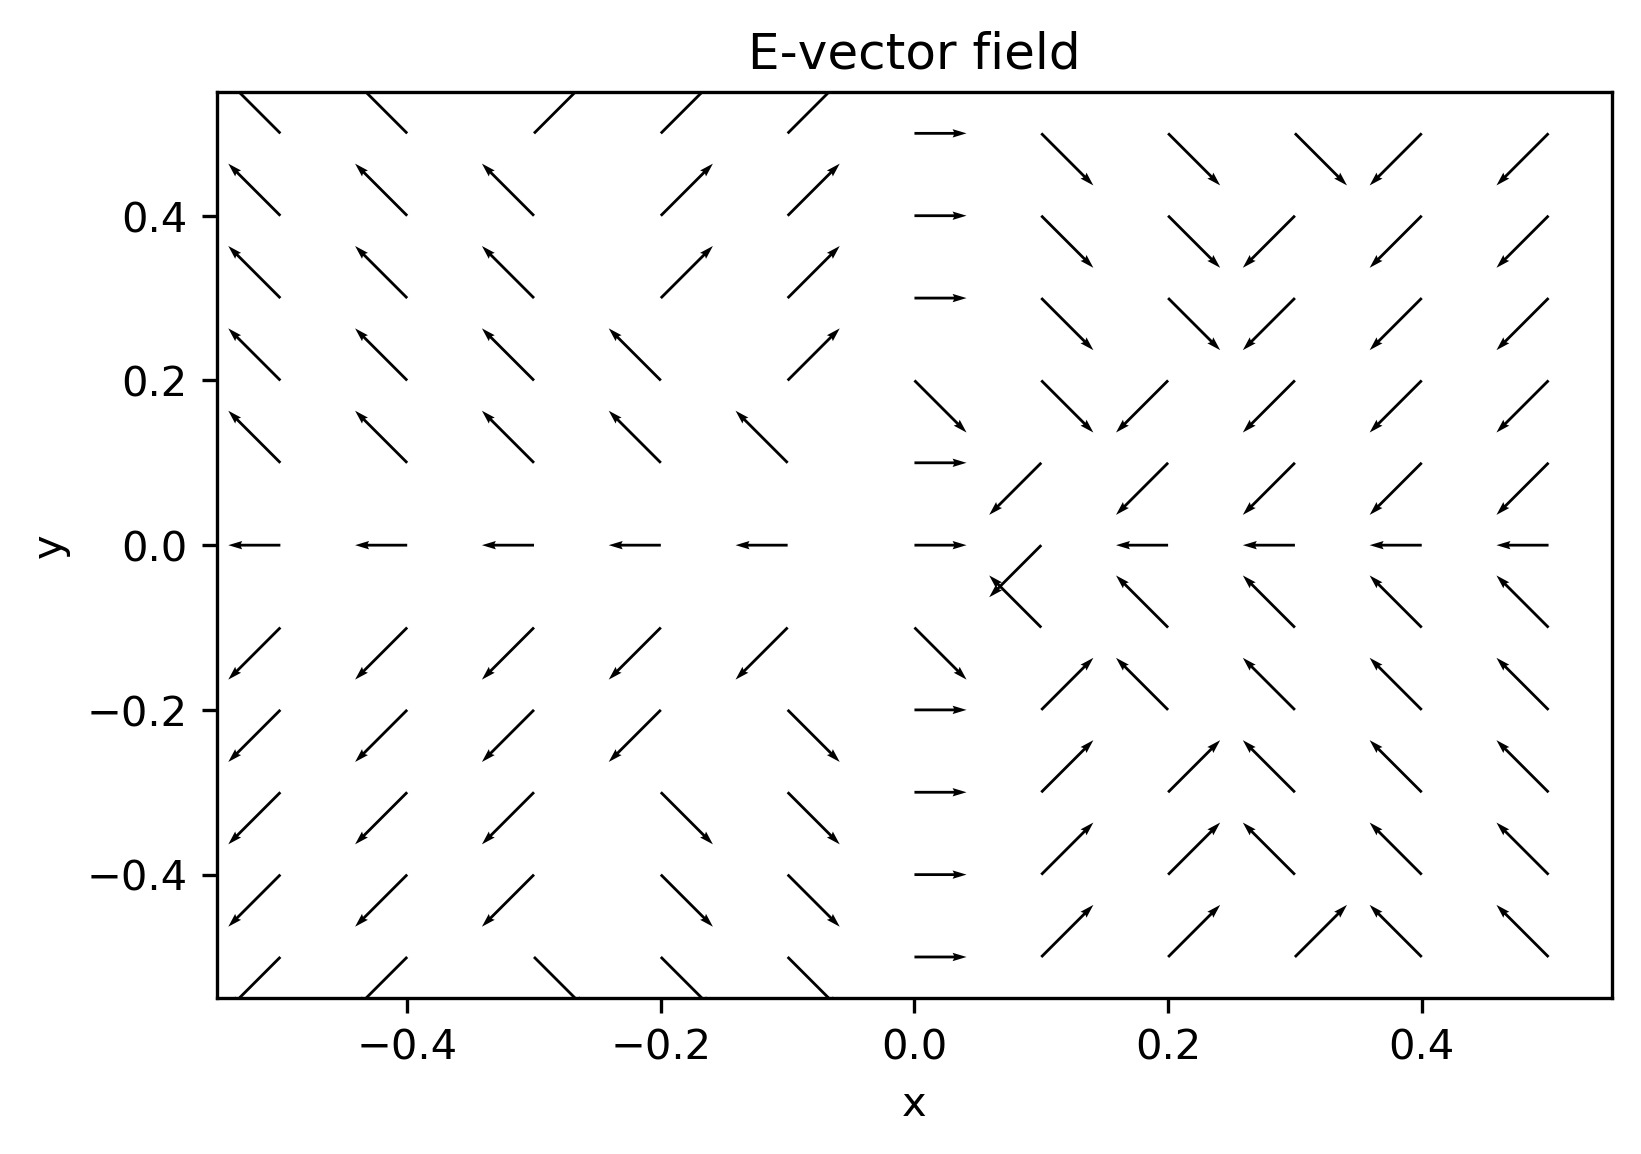

In [3]:
##### PART B

#Create ranges
x = np.arange(-0.5,0.51,0.1)
y = np.arange(-0.5,0.51,0.1)

N = len(x)

# intialize storage arrays
magX = np.empty([N,N])
magY = np.empty([N,N])

h = 10e-8
for i in range(len(x)):
    xval = x[i]
    for j in range(len(y)):
        yval = y[j]
        
        # r for df/dx
        r1x = np.sqrt((xval+h/2-0.05)**2+yval**2)
        r2x = np.sqrt((xval+h/2+0.05)**2+yval**2)
        r3x = np.sqrt((xval-h/2-0.05)**2+yval**2)
        r4x = np.sqrt((xval-h/2+0.05)**2+yval**2)
        
        # r for df/dy
        r1y = np.sqrt((xval-0.05)**2+(yval+h/2)**2)
        r2y = np.sqrt((xval+0.05)**2+(yval+h/2)**2)
        r3y = np.sqrt((xval-0.05)**2+(yval-h/2)**2)
        r4y = np.sqrt((xval+0.05)**2+(yval-h/2)**2)
        
        # create the derivatives
        dx = phi1(r1x)+phi2(r2x)-phi1(r3x)-phi2(r4x)
        dy = phi1(r1y)+phi2(r2y)-phi1(r3y)-phi2(r4y)
        dfdx = dx/h
        dfdy = dy/h
        
            
        # Fill the vectors to plot
        if dfdx != 0:
            magX[j,i] = dfdx / abs(dfdx)
        if dfdy != 0:
            magY[j,i] = dfdy / abs(dfdy)
        if dfdx == 0:
            magX[j,i] = dfdx
        if dfdy == 0:
            magY[j,i] = dfdy

# Plot using quiver
plt.figure(dpi=300)
plt.quiver(x, y, magX, magY, width = 0.002)
plt.title("E-vector field")
plt.ylabel("y")
plt.xlabel("x")

### Exercise 6.1: Resistor Circuit

The current net flow in/out of a junction must be zero, so for the V1 junction:

$$\frac{V_1-V_2}{R}+\frac{V_1-V_3}{R}+\frac{V_1-V_4}{R}+\frac{V_1-V_+}{R} = 0$$

or 

$$4V_1 - V_2 - V_3 - V_4 = V_+$$

a) Write the same equation for the remaining junctions:

$$\frac{V_2-V_1}{R}+\frac{V_2-V_4}{R}+\frac{V_2-0}{R} = 0$$
or
$$-V_1 + 3V_2 - V_4 = 0$$

for V3:

$$-V_1 +3V_3 - V_4 = V_+$$

for V4:

$$-V_1 - V_2 - V_3 + 4V_4 = 0$$

so we have:

$$\begin{bmatrix}
4 & -1 & -1 & -1 \\
-1 & 3 & 0 & -1 \\
-1 & 0 & 3 & -1 \\
-1 & -1 & -1 & 4 \\
\end{bmatrix}\begin{bmatrix} V_1 \\ V_2 \\ V_3 \\ V_4 \end{bmatrix} = \begin{bmatrix}5 \\ 0 \\ 5 \\ 0\end{bmatrix} $$


b) Write program to solve for Voltages using Gaussian Elimination


In [67]:
A = np.array([[ 4, -1, -1, -1],
             [ -1, 3, 0, -1],
             [-1, 0, 3, -1],
             [-1, -1, -1, 4]], float)
v = np.array([5,0,5,0])

def gaussElim(A, v):
    """Returns the solution to the system of a linear equations with variable coefficient matrix A (float), and answer vector v (float).  Returns the solutions to the variables in an array x. Does not include pivoting"""
    N = len(v)
    for m in range(N):
    
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div
    
        # Subtract from lower rows
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
        # Back Substitution
        x = np.empty(N,float)
        for m in range(N-1,-1,-1):
            x[m] = v[m]
            for i in range(m+1,N):
                x[m] -= A[m,i]*x[i]
    return x

circuitans1 = gaussElim(A,v)
print(f"V1 = {circuitans1[0]:4.2f}, V2 = {circuitans1[1]:4.2f}, V3 = {circuitans1[2]:4.2f}, V4 = {circuitans1[3]:4.2f}")



V1 = 2.05, V2 = 0.68, V3 = 2.50, V4 = 1.00


### Exercise 6.2: Partial Pivoting

a) Modify the program above to iniclude partial pivoting.  Show it gives the same answers as before.

b) Solve the following equations with your program and show that without pivoting it would fail:

$$\begin{bmatrix}
0 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3 \\
\end{bmatrix}\begin{bmatrix} w \\ x \\ y \\ z \end{bmatrix} = \begin{bmatrix}-4 \\ 3 \\ 9 \\ 7\end{bmatrix} $$

In [70]:
#### PART A

A = np.array([[ 4, -1, -1, -1],
             [ -1, 3, 0, -1],
             [-1, 0, 3, -1],
             [-1, -1, -1, 4]], float)
v = np.array([5,0,5,0])

def gaussElimPiv(A, v):
    """Returns the solution to the system of a linear equations with variable coefficient matrix A (float), and answer vector v (float).  Returns the solutions to the variables in an array x. Includes Pivoting"""
    N = len(v)
    for m in range(N):
        
        # Pivoting
        for j in range(N):
            if abs(A[m,m]) < abs(A[j,m]):
                A[[m,j]] = A[[j,m]]
                v[j],v[m] = v[m],v[j]
#         print(A)
#         print(v)

        # Divide by the diagonal element
        div = A[m,m]
#         print(div)
        A[m,:] /= div
        v[m] /= div
    
        # Subtract from lower rows
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
        # Back Substitution
        x = np.empty(N,float)
        for m in range(N-1,-1,-1):
            x[m] = v[m]
            for i in range(m+1,N):
                x[m] -= A[m,i]*x[i]
    return x


ans2 = gaussElim(A,v)
print(f"New answer: V1 = {ans2[0]:4.2f}, V2 = {ans2[1]:4.2f}, V3 = {ans2[2]:4.2f}, V4 = {ans2[3]:4.2f}")
print(f"Old answer: V1 = {circuitans1[0]:4.2f}, V2 = {circuitans1[1]:4.2f}, V3 = {circuitans1[2]:4.2f}, V4 = {circuitans1[3]:4.2f}")

New answer: V1 = 2.05, V2 = 0.68, V3 = 2.50, V4 = 1.00
Old answer: V1 = 2.05, V2 = 0.68, V3 = 2.50, V4 = 1.00


In [71]:
#### PART B

A = np.array([[ 0, 1, 4, 1],
             [ 3, 4, -1, -1],
             [1, -4, 1, 5],
             [2, -2, 1, 3]], float)
v = np.array([-4,3,9,7],float)

# Without pivoting we get a divide by zero error
ans3 = gaussElim(A,v)
print(ans3)

[nan nan nan nan]


/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/camfoltz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [72]:
# With pivoting we get the correct answer
A = np.array([[ 0, 1, 4, 1],
             [ 3, 4, -1, -1],
             [1, -4, 1, 5],
             [2, -2, 1, 3]], float)
v = np.array([-4,3,9,7],float)

ans4 = gaussElimPiv(A,v)
print(ans4)

[ 1.66666667 -0.5        -1.33333333  1.33333333]


### Exercise 6.3: LU Decomposition

a) Write a python function that calculates the LU decomp of a matrix.  This will return a matrix L (lower triangular) and matrix U (upper triangular).  We know:

$$L = L_0^{-1}L_21^{-1}...L_n^{-1}$$
$$U = L_n...L_1L_0A$$

and 
$$LU = A$$

b) Build on the function to use it to solve for:

$$\begin{bmatrix}
0 & 1 & 4 & 1 \\
3 & 4 & -1 & -1 \\
1 & -4 & 1 & 5 \\
2 & -2 & 1 & 3 \\
\end{bmatrix}\begin{bmatrix} w \\ x \\ y \\ z \end{bmatrix} = \begin{bmatrix}-4 \\ 3 \\ 9 \\ 7\end{bmatrix} $$

using LU Decomp method



In [87]:
#### PART A
A = np.array([[ 2, 1, 4, 1],
             [ 3, 4, -1, -1],
             [1, -4, 1, 5],
             [2, -2, 1, 3]], float)
v = np.array([-4,3,9,7])

def LUdecomp(A):
    """Provides the LU decomposition of a matrix A.  Returns the L matrix and the U matrix.  Multiplies LU to make sure the original A is recovered"""
    N = len(A[0,:])
    print(f"The Original A is \n\n {A} \n")
    
    #Create a zero-filled matrix
    L = np.zeros([N,N])
    
    #Set the first column of L to first column of A
    L[:,0] = A[:,0]
    
    for m in range(N):
    
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
#         v[m] /= div
    
        # Subtract from lower rows
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
#             v[i] -= mult*v[m]
    
        # Keep track of the L matrix values
        if m < N-1:
            L[m+1:,m+1] = A[m+1:,m+1]
            
    U = A
    print(f"The L matrix is \n\n {L} \n")
    print(f"The matrix U, which is equal to A in Echelon form is \n\n {U} \n")
    print(f"The recovered A, which is LU, is \n\n  {np.dot(L,U)} \n")

LUdecomp(A,v)

The Original A is 

 [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 

The L matrix is 

 [[  2.    0.    0.    0. ]
 [  3.    2.5   0.    0. ]
 [  1.   -4.5 -13.6   0. ]
 [  2.   -3.  -11.4  -1. ]] 

The matrix U, which is equal to A in Echelon form is 

 [[ 1.   0.5  2.   0.5]
 [ 0.   1.  -2.8 -1. ]
 [-0.  -0.   1.  -0. ]
 [-0.  -0.  -0.   1. ]] 

The recovered A, which is LU, is 

  [[ 2.  1.  4.  1.]
 [ 3.  4. -1. -1.]
 [ 1. -4.  1.  5.]
 [ 2. -2.  1.  3.]] 



In [74]:
A = np.array([[ 2, 1, 4, 1],
             [ 3, 4, -1, -1],
             [1, -4, 1, 5],
             [2, -2, 1, 3]], float)
v = np.array([-4,3,9,7])

def LUsolve(A,v):
    """Returns the solutions to Ax=v using an LU decomposition.  Returns the values of xi in an array (floats)"""
    N = len(A[0,:])
    
    #Create a zero-filled matrix
    L = np.zeros([N,N])
    
    #Set the first column of L to first column of A
    L[:,0] = A[:,0]
    
    for m in range(N):
    
        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div
    
        # Subtract from lower rows
        for i in range(m+1, N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
    
        # Keep track of the L matrix values
        if m < N-1:
            L[m+1:,m+1] = A[m+1:,m+1]
            
    U = A
    
    # Back Substitution for y
    y = np.empty(N,float)
    for m in range(N-1,-1,-1):
        y[m] = v[m]
        for i in range(m+1,N):
            y[m] -= L[m,i]*v[i]

    # Back Substitution for x
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]
    return x

answer = LUsolve(A,v)
npanswer = np.linalg.solve(A,v)

print(f"My answer is\n  {answer}")
print(f"Numpy's answer is \n {npanswer}")

My answer is
  [ 7.9 -7.8 -1.  -8. ]
Numpy's answer is 
 [ 7.9 -7.8 -1.  -8. ]


### Exercise 6.4: Circuits Again

Solve the same problem as 6.1 but using np.solve.

In [89]:
A = np.array([[ 4, -1, -1, -1],
             [ -1, 3, 0, -1],
             [-1, 0, 3, -1],
             [-1, -1, -1, 4]], float)
v = np.array([5,0,5,0])

# Original Answer
circuitans1 = gaussElim(A,v)
print(f"The original answer was: \n V1 = {circuitans1[0]:4.2f}, V2 = {circuitans1[1]:4.2f}, V3 = {circuitans1[2]:4.2f}, V4 = {circuitans1[3]:4.2f}")

# Numpy's answer
npcircuitanswer = np.linalg.solve(A,v)
print(f"Numpy's answer is: \n V1 = {npcircuitanswer[0]:4.2f}, V2 = {npcircuitanswer[1]:4.2f}, V3 = {npcircuitanswer[2]:4.2f}, V4 = {npcircuitanswer[3]:4.2f}")


The original answer was: 
 V1 = 2.05, V2 = 0.68, V3 = 2.50, V4 = 1.00
Numpy's answer is: 
 V1 = 2.05, V2 = 0.68, V3 = 2.50, V4 = 1.00


### Exercise 6.7: More Circuits
a) Show that the voltages satisfy the equations:

$$3V_1 - V_2 - V_3 = V_+$$
$$-V_1 + 4V_2 - V_3 - V_4 = V_+$$
$$\cdots$$
$$V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V{i+2} = 0$$
$$\cdots$$
$$-V_{N-3} - V_{N-2} + 4V_{N-1} - V_N = 0$$
$$-V_{N-2} - V_{N-1} + 3V_N = 0$$

Express this in matrix form, Av = w and find the values of matrix A and vector w

b) Write a program to solve for $V_i$ when $N = 6$.

c) Repeat this for $N = 10000$ Utilize the banded function. Plot results (internal voltage vs. internal point)

#### part a)

V1: $\frac{V_1 - V_+}{R} + \frac{V_1 - V_2}{R} + \frac{V_1 - V_3}{R} = 0$ $\rightarrow$ $3V_1 - V_2 - V_3 = V_+$

V2: $\frac{V_2 - V_1}{R} + \frac{V_2 - V_3}{R} + \frac{V_2 - V_+}{R} + \frac{V_2 - V_4}{R} = 0$ $\rightarrow$ $-V_1 + 4V_2 - V_3 - V_4 = V_+$

Now we have the first one not touching $V_+$:

V3: $\frac{V_3 - V_1}{R} + \frac{V_3 - V_2}{R} + \frac{V_3 - V_4}{R} + \frac{V_3 - V_5}{R} = 0$ $\rightarrow$ $-V_1 - V_2 + 4V_3 - V_4 - V_5 = 0$

this holds until $V_{N-1}$ which touches 0, so:

Vi: $\frac{V_{i} - V_{i-2}}{R} + \frac{V_{i} - V_{i-1}}{R} + \frac{V_i - V_{i+1}}{R} + \frac{V_i - V_{i+2}}{R} = 0$ $\rightarrow$ $-V_{i-2} - V_{i-1} + 4V_i - V_{i+1} - V_{i+2} = 0$

when we get to the end we have:

V(N-1): $\frac{V_{N-1} - V_{N-3}}{R} + \frac{V_{N-1} - V_{N-2}}{R} + \frac{V_{N-1} - V_{N}}{R} + \frac{V_{N-1} - 0}{R} = 0$ $\rightarrow$ $-V_{N-3} - V_{N-2} + 4V_{N-1} - V_{N} = 0$

and finally:

V(N): $\frac{V_{N} - V_{N-2}}{R} + \frac{V_{N} - V_{N-1}}{R} + \frac{V_{N} - 0}{R} = 0$ $\rightarrow$ $-V_{N-2} - V_{N-1} + 3V_{N}= 0$

This leads us to the matrix:
$$\begin{pmatrix}
3 & -1 & -1  \\
-1 & 4 & -1 & -1\\
 -1 & -1 & 4 & -1 & -1 \\
& \ddots & \ddots & \ddots & \ddots & \ddots &  \\
&&-1 & -1 & 4 & -1 & -1 \\
&&& \ddots & \ddots & \ddots & \ddots & \ddots &  \\
&&&& -1 & -1 & 4 & -1 \\
&&&&& -1 & -1 & -3 \\
\end{pmatrix}\begin{pmatrix} V1 \\ V2 \\ V3 \\ \vdots \\ V_i \\ \vdots \\ V_{N-1} \\ V_N \end{pmatrix} = \begin{pmatrix}V_+ \\ V_+ \\ 0 \\ \vdots \\ 0 \\ \vdots \\ 0 \\ 0\end{pmatrix} $$

or with values:

$$A = \begin{pmatrix}
(\alpha - k) & -k & -k  \\
-k & \alpha & -k & -k\\
 -k & -k & \alpha & -k & -k \\
& \ddots & \ddots & \ddots & \ddots & \ddots &  \\
&&-k & -k & \alpha & -k & -k \\
&&& \ddots & \ddots & \ddots & \ddots & \ddots &  \\
&&&& -k & -k & \alpha & -k \\
&&&&& -k & -k & (\alpha-k) \\
\end{pmatrix}$$

In [76]:
### PART B

#Constants
N = 6
C = 5
alpha = 4
k = 1

# Construct Matrix
A = np.zeros([N,N],float)
for i in range(N):
    A[0,0] = alpha-k
    A[5,5] = alpha-k
    A[1,0] = -k
    A[5,3:5] = -k
    if i < N-1:
        A[i,(i-2):(i)] = -k
        A[i,(i+1):(i+3)] = -k
        A[i+1,i+1] = alpha
print(f"A = \n{A} \n ")

#Construct v
v = np.zeros(6)
v[0] = 5
v[1] = 5


ans = np.linalg.solve(A,v)

print(f"The answer is \n V1 = {ans[0]:.2f}, V2 = {ans[1]:.2f}, V3 = {ans[2]:.2f}, V4 = {ans[3]:.2f}, V5 = {ans[4]:.2f}, V6 = {ans[5]:.2f}")
      

A = 
[[ 3. -1. -1.  0.  0.  0.]
 [-1.  4. -1. -1.  0.  0.]
 [-1. -1.  4. -1. -1.  0.]
 [ 0. -1. -1.  4. -1. -1.]
 [ 0.  0. -1. -1.  4. -1.]
 [ 0.  0.  0. -1. -1.  3.]] 
 
The answer is 
 V1 = 3.73, V2 = 3.43, V3 = 2.75, V4 = 2.25, V5 = 1.57, V6 = 1.27


A = 
[[ 3.  0.  0. ...  0.  0.  0.]
 [-1.  4. -1. ...  0.  0.  0.]
 [-1. -1.  4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  4. -1. -1.]
 [ 0.  0.  0. ... -1.  4. -1.]
 [ 0.  0.  0. ... -1. -1.  3.]] 
 


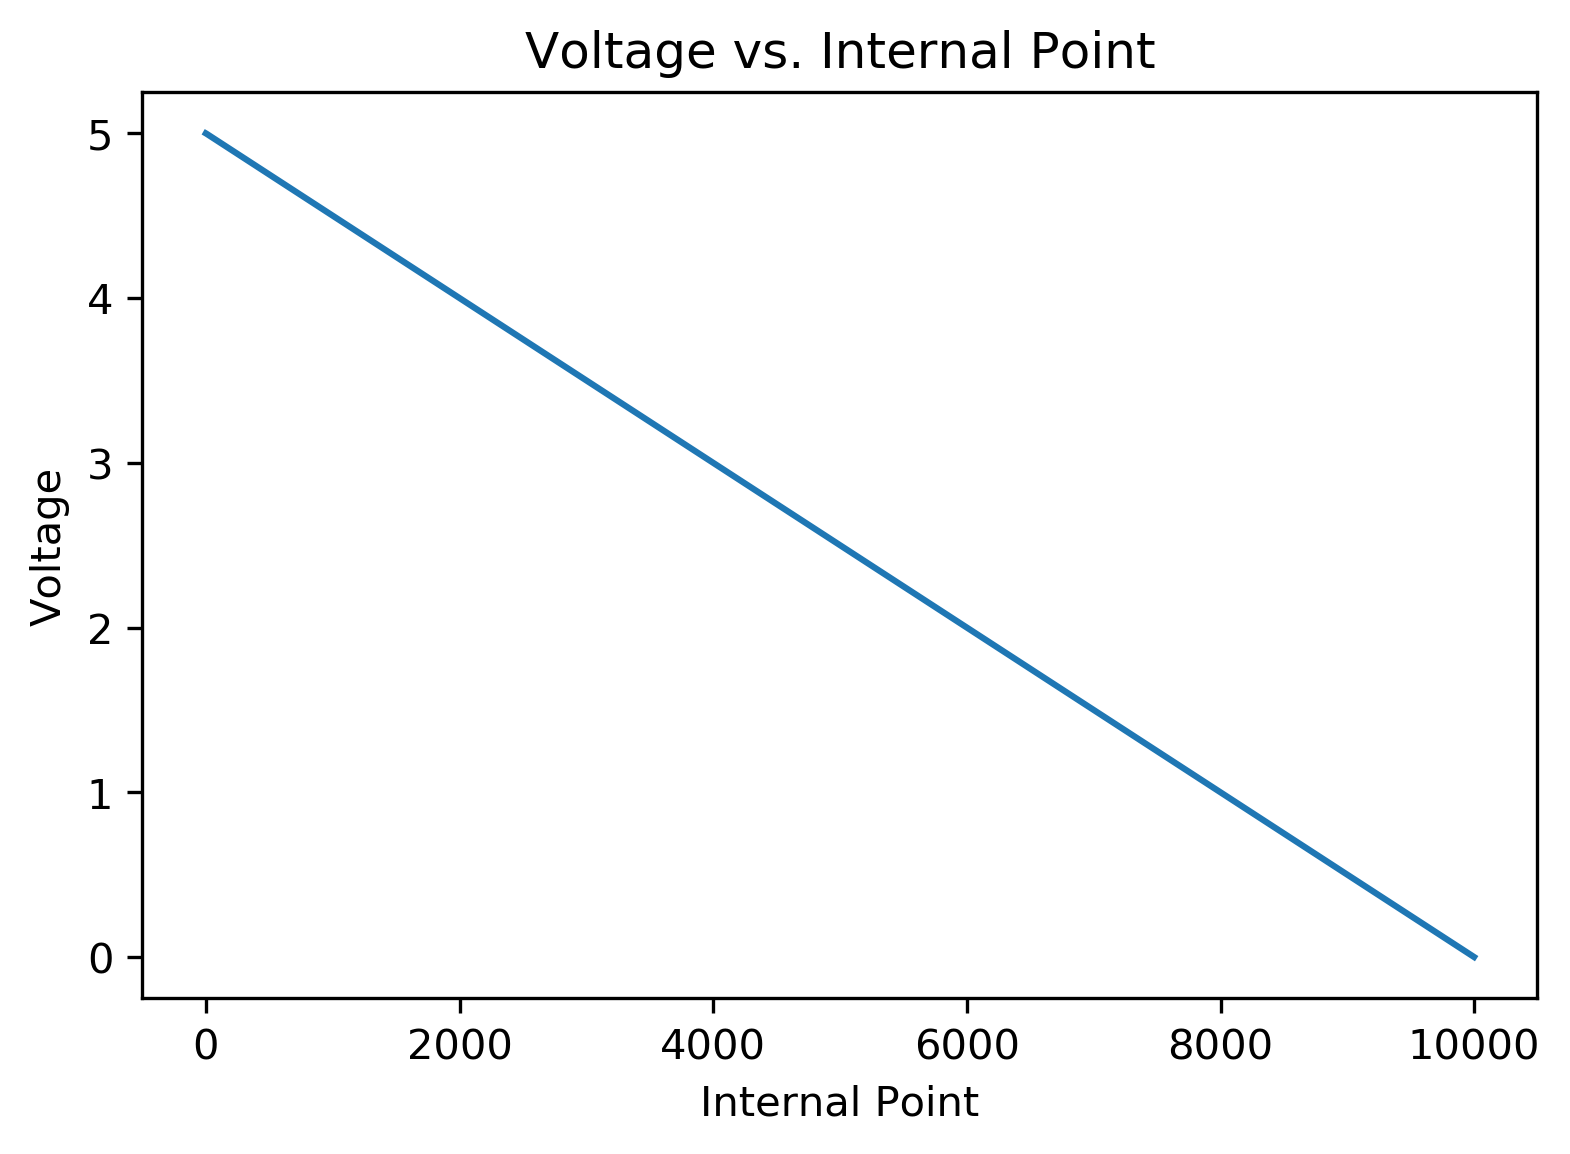

In [80]:
## PART C, page 250,535 for banded

#Constants
N = 10000
C = 5.0
alpha = 4.0
k = 1.0
up = 2
down = 2


# Construct Matrix
A = np.empty([N,N],float)

# Fill in the first 2 rows
A[0,0] = alpha-k
A[N-1,N-1] = alpha-k
A[1,0] = -k
A[N-1,N-3:N-1] = -k

#Fill in the off-diagonal and diagonal terms
for i in range(1,N-1):
    A[i,(i-2):(i)] = -k
    A[i,(i+1):(i+3)] = -k
    A[i,i] = alpha
print(f"A = \n{A} \n ")


# Construct banded matrix
Anew = np.empty([1+up+down, N], float)
Anew[0, :] = -k
Anew[1, :] = -k
Anew[2, :] = alpha
Anew[3, :] = -k
Anew[4, :] = -k
Anew[2, 0] = alpha-k
Anew[2, N-1] = alpha-k


# print(Anew)

# Construct v
v = np.empty(N)
v[0] = C
v[1] = C


points = banded(Anew, v, up, down)

plt.figure(dpi=300)
plt.plot(points)
plt.title("Voltage vs. Internal Point")
plt.xlabel("Internal Point")
plt.ylabel("Voltage")
plt.show()

### Exercise 6.8: QR Algorithm

b) Write a function that takes A (square Matrix) as its arguments and returns the two Q,R matricies that form its QR decomp.  Try that it works for:

$$A = \begin{pmatrix}
1 & 4 & 8 & 4 \\
4 & 2 & 3 & 7 \\
8 & 3 & 6 & 9 \\
4 & 7 & 9 & 2 \\
\end{pmatrix}$$

$$\vec{u_i} = \vec{a_i} - \sum_{j=0}^{i-1}(\vec{q_j}•\vec{a_i})\vec{q_j}$$

and
$$\vec{q_i} = \frac{\vec{u_i}}{| \vec{u_i} |}$$

c) Write a complete program that calculates eigen values/vectors of a real-symmetric matrix.  Continue the calculation until the magnitude of every off-diagonal element is smaller than $10^{-6}$. Test it on the matrix above.  You should find the eigen values are 1, 21, -3, and -8

In [81]:
### Part B
def QRdecomp(A):
    """Provides the QR decomposition of matrix A, A must be square symmetric.  Returns the matricies Q and R"""
    N = len(A[0,:])
    Q = np.empty([N,N], float)
    R = np.zeros([N,N], float)
    
    Acol = []
    
    # intiliaze the first q and u vectors
    for i in range(N):
        Acol.append(A[:,i])
        
    ucol = [np.copy(Acol[0])]
    qcol = [np.copy(Acol[0]) / np.linalg.norm(Acol[0])]
    
    #Graham-Schmidt Process
    for i in range(1,N):
        ucol.append(np.copy(Acol[i]))
        for j in range(i):
            ucol[i] -= np.dot(qcol[j], Acol[i])*qcol[j]
        qcol.append(ucol[i]/np.linalg.norm(ucol[i]))
    
    #Construct Q
    for i in range(N):
        Q[:,i] = qcol[i]
        
    # Fill in R
    for i in range(N):
        for j in range(N):
            if i == j:
                R[i,i] = np.linalg.norm(ucol[i])
            elif i < j:
                R[i,j] = np.dot(Q[:,i],Acol[j])
                
    return Q,R

A = np.array([[1,4,8,4],
              [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)

x = QRdecomp(A)

print(f"Q = \n {x[0]}")
print(f"R = \n {x[1]}")
print(f"QR = {np.dot(x[0],x[1])} \n which returns the original A")

Q = 
 [[ 0.10153462  0.558463    0.80981107  0.1483773 ]
 [ 0.40613847 -0.10686638 -0.14147555  0.8964462 ]
 [ 0.81227693 -0.38092692  0.22995024 -0.37712564]
 [ 0.40613847  0.72910447 -0.5208777  -0.17928924]]
R = 
 [[ 9.8488578   6.49821546 10.55960012 11.37187705]
 [ 0.          5.98106979  8.4234836  -0.484346  ]
 [ 0.          0.          2.74586406  3.27671222]
 [ 0.          0.          0.          3.11592335]]
QR = [[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]] 
 which returns the original A


In [86]:
### PART C

def eigen(A, error):
    """This computes the eigen values/vectors of a matrix A using the QR algorithm.  It will run until the off diagonal elements are smaller than the error."""
    N = len(A[:,0])
    V = np.identity(N)
    value = 1
    run = True
    while (run==True):
        x = QRdecomp(A)
        Q = x[0]
        R = x[1]
        A = np.dot(R,Q)
        V = np.dot(V,Q)
        
        # Check the off-diagonal terms
        
        
        # create array to hold checks
        check = []
        
        # if off-diagonal element is below threshold, append check
        for i in range(N):
            for j in range(N):
                if i != j:
                    if A[i,j] < error:
                        check.append(1)
                    else:
                        continue
                        
        #Check that the length of check is the total of off-diagonal elements
        #if true, stop running the program
        if len(check) == N*N-N:
            run = False
        else:
            continue
            
    return A,V
    
Atest = np.array([[1,4,8,4],
              [4,2,3,7],
             [8,3,6,9],
             [4,7,9,2]],float)

answer = eigen(Atest, 10e-6)

print(f"The eigen values of A are: \n {answer[0].diagonal()} \n")
print(f" The eigen vectors of A are: \n {answer[1]}")


The eigen values of A are: 
 [21. -8. -3.  1.] 

 The eigen vectors of A are: 
 [[ 0.43151704 -0.38357063 -0.77459662 -0.25819893]
 [ 0.38357057  0.43151702 -0.25819896  0.77459666]
 [ 0.6233022   0.52740976  0.25819887 -0.51639777]
 [ 0.52740974 -0.62330216  0.51639782  0.25819891]]


### Exercise 6.9: Assymetric Quantum Well

a) Show that $\hat{H}\psi = E\psi$ has certain implications and that this EQ can be written in matrix form.

We have the S.E.:

$$\hat{H} = -\frac{\hbar^2}{2M}\frac{d^2}{dx^2}+V(x)$$

We then express the wavefunction as a Fourier Series:

$$\psi(x) = \sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}$$

with $\psi_n$ being Fourier coefficients.

Given the width of a well L, we know that these states must be orthogonal, yielding the relationship:

$$\int_{0}^{L}sin\frac{\pi mx}{L}sin\frac{\pi nx}{L} dx = \begin{cases}
      \frac{L}{2} & \text{if } m = n \\
      0 & \text{otherwise}
      \end{cases}$$

Now we go back to the S.E.:

$$\hat{H}\psi = E\psi$$

$$\hat{H}\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L} = E\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}$$

Now we introduce $sin\frac{\pi mx}{L}$ to both sides and integrate:


$$\hat{H}\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}sin\frac{\pi mx}{L} = E\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}sin\frac{\pi mx}{L}$$

$$\int_{0}^{L}\hat{H}\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}sin\frac{\pi mx}{L} = \int_{0}^{L}E\sum_{n=1}^{\infty}\psi_nsin\frac{\pi nx}{L}sin\frac{\pi mx}{L}$$

$$\sum_{n=1}^{\infty}\psi_n\int_{0}^{L}sin\frac{\pi nx}{L}\hat{H}sin\frac{\pi mx}{L} = \int_{0}^{L}Esin\frac{\pi nx}{L}sin\frac{\pi mx}{L}\sum_{n=1}^{\infty}\psi_n$$

Due to orthogonality, all of the terms in the sum go to zero except when $m=n$ so:

$$\sum_{n=1}^{\infty}\psi_n\int_{0}^{L}\hat{H}sin\frac{\pi nx}{L}sin\frac{\pi mx}{L} = \frac{L}{2}E\psi_m$$

We can then define the matrix elements of $\hat{H}$:
$$H_{mn} = \frac{2}{L}\int_{0}^{L}sin\frac{\pi mx}{L}\left[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2}+V(x)\right]sin\frac{\pi nx}{L}dx$$



b) For $V(x) = ax/L$ Solve for $H_{mn}$ Analytically where:

$$H_{mn} = \frac{2}{L}\int_{0}^{L}sin\frac{\pi mx}{L}\left[-\frac{\hbar^2}{2M}\frac{d^2}{dx^2}+V(x)\right]sin\frac{\pi nx}{L}dx$$
$$= \frac{2}{L}\int_{0}^{L}sin\frac{\pi mx}{L}sin\frac{\pi nx}{L}\left[\frac{\hbar^2\pi^2 n^2}{2ML^2}+\frac{ax}{L}\right]dx$$

$$= \frac{2a}{L^2}\int_{0}^{L}xsin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx + \frac{\hbar^2\pi^2n^2}{ML^3}\int_{0}^{L}sin\frac{\pi mx}{L}sin\frac{\pi nx}{L}dx$$

$$\int_{0}^{L}sin\frac{\pi mx}{L}sin\frac{\pi nx}{L} dx = \begin{cases}
      \frac{L}{2} & \text{if } m = n \\
      0 & \text{otherwise}
      \end{cases}$$

$$H_{mn} = \begin{cases}
      0 & \text{if } m\neq n \text{and m,n are both even or odd} \\
      \frac{-8amn}{\pi^2(m^2-n^2)^2} & \text{if } m\neq n \text{and one is even, one is odd} \\ \frac{\hbar^2\pi^2n^2}{ML^3} + \frac{a}{2} & \text{if }m = n
      \end{cases}$$
      
Write a python program to evaluate $H_{mn}$ for arbitrary m and n. L = 5 angstroms, a = 10 eV $m_e = 9.1094\times 10^{-31} kg$

c) Create 10x10 array of Hamiltonian elements for m,n up to 10.  Calculate the eigenvalues of this matrix.

In [83]:
### PART B

def H(m,n):
    """Defines the hamiltonian matrix element for integer values m,n.  Returns float value"""
    
    #Define Constants
    M = m_e #kg
    q = 1.6022e-19 #C 
    a = 1.6022e-18 #J 
    L = 5.0e-10 #meters 
    hbar = 1.054e-34
    #First condition
    if m != n:
        if m % 2 == 0 and n % 2 == 0:
            return 0
        elif m % 2 == 1 and n % 2 == 1:
            return 0
        
        # Second condition
        elif m % 2 == 1 and n % 2 == 0:
            return -8*a*m*n/(np.pi**2*(m**2-n**2)**2) 
        elif m % 2 == 0 and n % 2 == 1:
            return -8*a*m*n/(np.pi**2*(m**2-n**2)**2)
        
    # Last condition
    else:
        return a/2 + hbar**2*np.pi**2*n**2/2/M/L**2


In [84]:
### PART C

#Create Hamiltonian
Ham = np.zeros([10,10])
for i in range(1,11):
    for j in range(1,11):
        Ham[i-1,j-1] = H(i,j)
        
# print(Ham)

# Solve for Eigen Values:
x = np.linalg.eigvalsh(Ham)

# Convert J to eV
x /= 1.60218e-19

#Print Answers
for i in range(len(x)):
    print(f"For n = {i}, E = {x[i]:4.2f} eV")

For n = 0, E = 5.83 eV
For n = 1, E = 11.17 eV
For n = 2, E = 18.65 eV
For n = 3, E = 29.12 eV
For n = 4, E = 42.61 eV
For n = 5, E = 59.13 eV
For n = 6, E = 78.65 eV
For n = 7, E = 101.18 eV
For n = 8, E = 126.72 eV
For n = 9, E = 155.39 eV


### Part 6.16: Lagrange Point

a) Show that the distance r from the center of the Earth to the $L_1$ point satisfies:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2r$$


part a)
$$F = m_sa_c$$

$$F = m_s\frac{v^2}{r}$$

$$F1 - F2 = m_s\omega^2r$$

$$\frac{GMm_s}{r^2} - \frac{Gmm_s}{(R-r)^2} = m_s\omega^2r$$

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2r$$

In [85]:
### PART B - SECANT METHOD

# Define Constants
G = 6.674e-11 #m^2/kg/s^2
M = 5.974e24 #kg
m = 7.348e22 #kg
R = 3.844e8 #m
omega = 2.662e-6 #1/s
guess = R*(3/5)#L1 must be closer to the moon since the moon is less massive

def f(r):
    return G*M/r**2 - G*m/(R-r)**2 - omega**2*r


def secant(f,guess):
    """This function calculates the distance to the first lagrange point as a float, with the input of the F-ma function"""
    
    # pick first two starting points
    r0 = guess
    r1 = guess*100
    
    #Stop before divide by zero error
    while abs(f(r1) - f(r0)) > 0:
        r =  r1 - f(r1)*(r1-r0)/(f(r1) - f(r0))
        r0 = r1
        r1 = r
    return r

x = secant(f,guess)

print(f"The distance to L1 is {x:.6} m")


The distance to L1 is 3.26045e+08 m
